 Heart Disease Prediction with Decision Tree + Visualization (Charts)

Step 1: Import Required Libraries

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay


📄 Step 2: Load the Dataset

In [14]:
df = pd.read_csv('heart-disease.csv')  # Load your dataset
print(df.head())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


📊 Step 3: Visualize Dataset (EDA)
1. Class Distribution

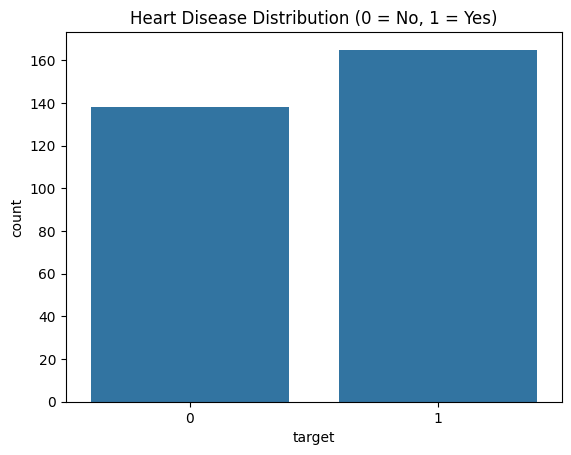

In [15]:
sns.countplot(x='target', data=df)
plt.title("Heart Disease Distribution (0 = No, 1 = Yes)")
plt.show()


2. Correlation Heatmap

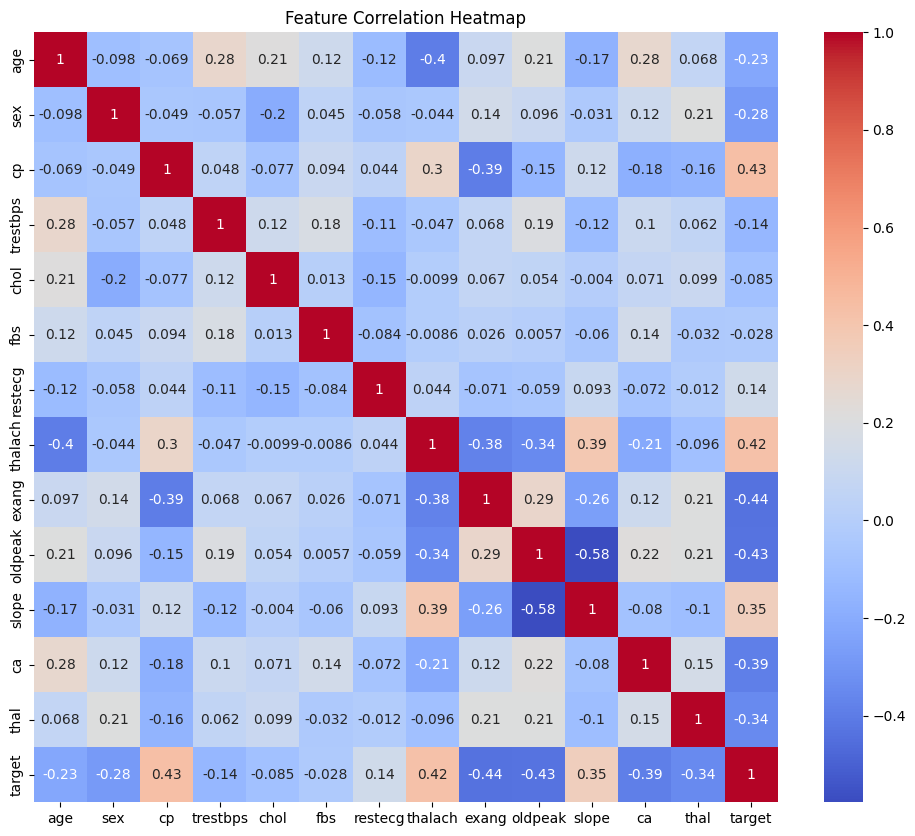

In [16]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


🧹 Step 4: Preprocess Data

In [17]:
X = df.drop('target', axis=1)
y = df['target']

# Optional: scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


🌳 Step 5: Train Decision Tree Model

In [18]:
model = DecisionTreeClassifier(max_depth=4, random_state=42)
model.fit(X_train, y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


📈 Step 6: Evaluate the Model

In [19]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8524590163934426


📉 Step 7: Visualize Evaluation Metrics
1. Confusion Matrix

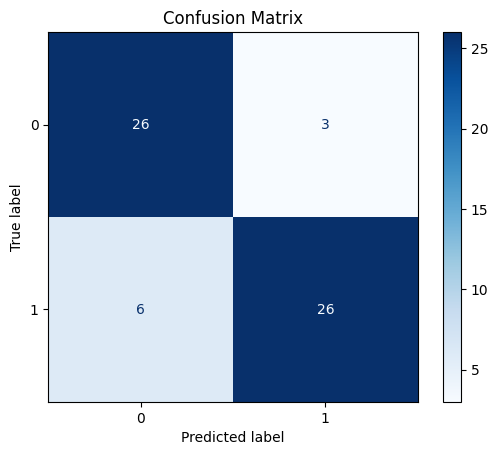

In [20]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


2. Classification Report (textual)

In [21]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.81      0.90      0.85        29
           1       0.90      0.81      0.85        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



🌲 Step 8: Visualize the Decision Tree

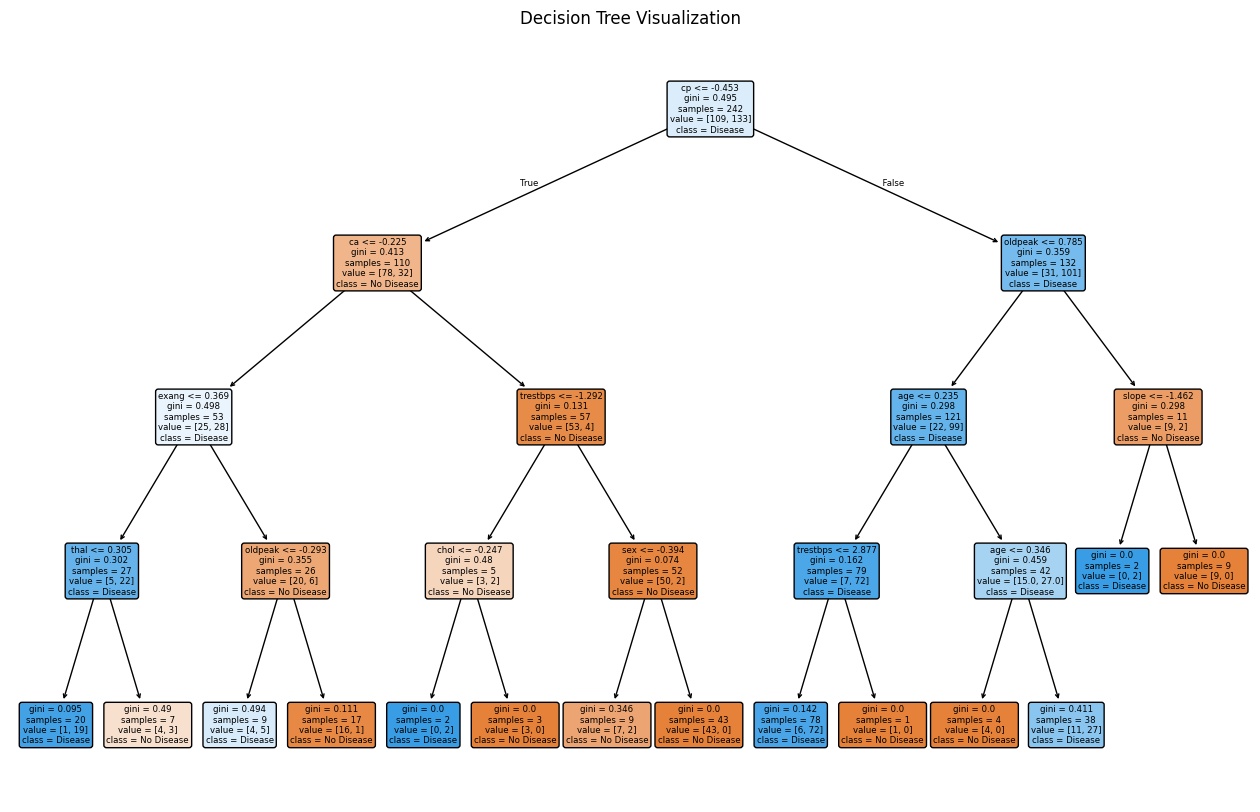

In [22]:
plt.figure(figsize=(16, 10))
plot_tree(model, feature_names=df.columns[:-1], class_names=["No Disease", "Disease"], filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()
